In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# Step 1: Load and prepare the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize the data

In [21]:
# Build the model
model = Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the input
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [22]:
# Compile the model
model.compile(optimizer=Adam(),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [23]:
# Train the model
model.fit(x_train, y_train, epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8802 - loss: 0.4275
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9644 - loss: 0.1215
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9770 - loss: 0.0776
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9831 - loss: 0.0564
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9849 - loss: 0.0460
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9901 - loss: 0.0342
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9915 - loss: 0.0279
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9937 - loss: 0.0209
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9945 - loss: 0.0176
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9954 - loss: 0.0147
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9964 - loss: 0.0120
Epoch 12/15
1875/1875 ━━━━━━━━

In [24]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9741 - loss: 0.1082

Test accuracy: 0.9782000184059143


In [25]:
# Save the model
model.save('mnist_model.h5')

In [26]:
# Step 2: Load the model
model = load_model('mnist_model.h5')

In [27]:
# Step 3: Preprocess your handwritten digit image
def preprocess_image(image_path):
    # Load the image
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28))  # Resize to 28x28 pixels
    
    # Invert the image (if necessary)
    img = np.invert(img)
    
    # Normalize the image
    img = np.array(img) / 255.0
    
    # Add batch dimension
    img = np.expand_dims(img, axis=0)
    
    return img

In [36]:
# Example usage
image_path = '5_digit.jpg'
img = preprocess_image(image_path)

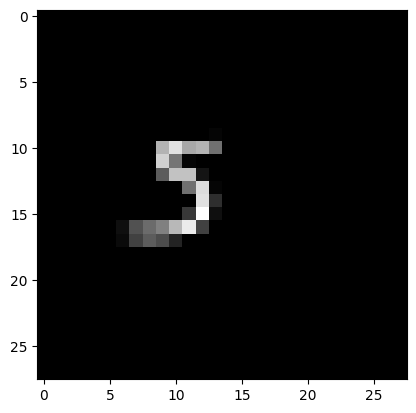

In [37]:
# Display the image
plt.imshow(img[0], cmap='gray')
plt.show()

In [38]:
# Step 4: Make predictions
predictions = model.predict(img)
predicted_digit = np.argmax(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [39]:
print(f'Predicted digit: {predicted_digit}')

Predicted digit: 5
